# Fig 2


# Load the data to replicate the results from experiment
## Results from Vladimou et al., 2017

### Load the data from /data/Fig2-data

In [1]:
setwd("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig2-data")
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”

# Helicobacter pylori in Lamina propria

In [2]:
WT <-read.csv("output_lp_HP_State0_3.csv", header = FALSE)
Clodronate <-read.csv("output_lp_HP_State0_0.csv", header = FALSE)
LysMCre <-read.csv("output_lp_HP_State0_1.csv", header = FALSE)
PPARgCD4Cre <-read.csv("output_lp_HP_State0_2.csv", header = FALSE)
data <- data.frame(WT,PPARgCD4Cre, Clodronate, LysMCre)
cols = c("black", "green", "red", "blue")

In [3]:
library(ggplot2)
p <- ggplot(data=WT, aes(WT$V1), legend="Groups") + 
  geom_line(aes(y=WT$V2, color=".WT"), size=1) + 
  geom_ribbon(aes(ymin=WT$V2-WT$V3/sqrt(60),
                  ymax=WT$V2+WT$V3/sqrt(60)), 
             alpha=0.6, fill="grey70") +
  geom_line(aes(y=PPARgCD4Cre$V2, color="PPARgCD4Cre") , size=1) + 
  geom_ribbon(aes(ymin=PPARgCD4Cre$V2-PPARgCD4Cre$V3/sqrt(60),
                  ymax=PPARgCD4Cre$V2+PPARgCD4Cre$V3/sqrt(60)), 
              alpha=0.6, fill="green") +
  geom_line(aes(y=LysMCre$V2, color="LysMCre"), size=1) + 
  geom_ribbon(aes(ymin=LysMCre$V2-LysMCre$V3/sqrt(60),
                  ymax=LysMCre$V2+LysMCre$V3/sqrt(60)), 
               alpha=0.6, fill = "blue") +
  geom_line(aes(y=Clodronate$V2, color="Clodronate"), size=1) + 
  geom_ribbon(aes(ymin=Clodronate$V2-Clodronate$V3/sqrt(60),
                  ymax=Clodronate$V2+Clodronate$V3/sqrt(60)), 
              alpha=0.6, fill = "red")+ 
scale_colour_manual(name="Groups", values=c(".WT"="black","PPARgCD4Cre"="green","LysMCre"="blue","Clodronate"="red"))


## Modifying attributes of the ggplot

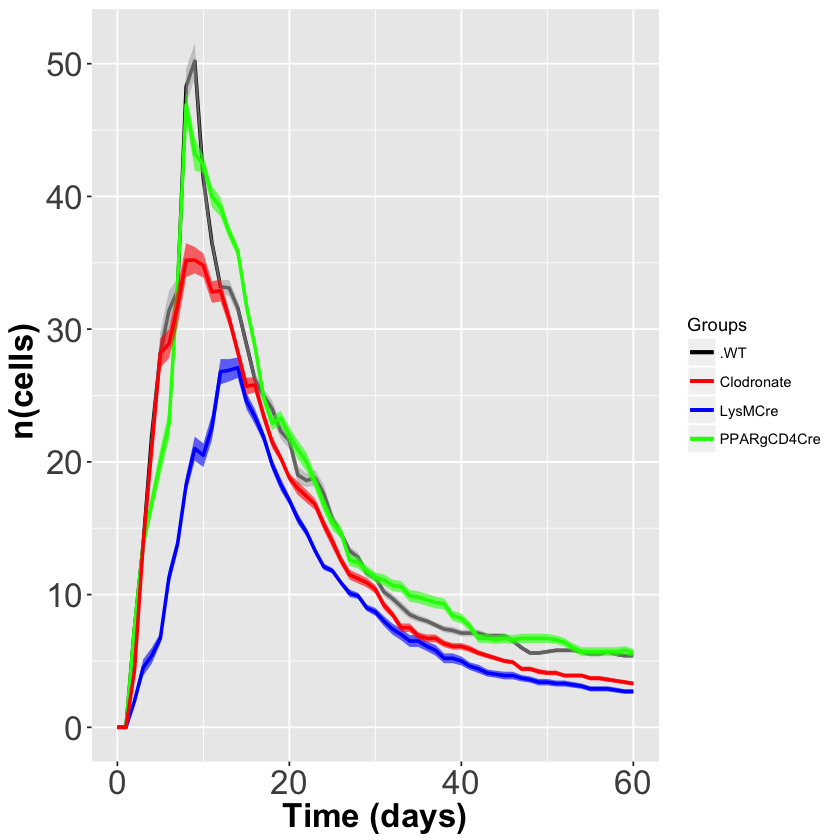

In [4]:
p + labs(x = "Time (days)", y = " n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))

### Saving output in pdf file
#### Uncomment the following lines

In [ ]:
#library(gplots)
#pdf(paste0("LP_HP.pdf"), 7, 5)
#p + labs(x = "Time (days)", y = " n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))
#dev.off()

### Statistics - ANOVA analysis

In [5]:
data1 <- WT[1:60,]
data2 <- PPARgCD4Cre[1:60,]
data3 <- Clodronate[1:60,]
data4 <- LysMCre[1:60,]
data = c(data1["V2"], data2["V2"],data3["V2"], data4["V2"])
data = unlist(data, use.names = FALSE)
length = lengths(data1["V2"])
params = c(rep.int(".WT", length), rep.int("CD4Cre", length), rep.int("Clodronate", length), rep.int("LysMCre", length))
df = data.frame(data, params)
results = aov(df$data ~ df$params)
print(summary(results))


             Df Sum Sq Mean Sq F value Pr(>F)  
df$params     3   1294   431.3   3.823 0.0106 *
Residuals   236  26631   112.8                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$data ~ df$params)

$`df$params`
                        diff        lwr        upr     p adj
CD4Cre-.WT          0.265000  -4.753156  5.2831560 0.9990873
Clodronate-.WT     -2.060000  -7.078156  2.9581560 0.7128667
LysMCre-.WT        -5.541667 -10.559823 -0.5235106 0.0239081
Clodronate-CD4Cre  -2.325000  -7.343156  2.6931560 0.6282066
LysMCre-CD4Cre     -5.806667 -10.824823 -0.7885106 0.0160058
LysMCre-Clodronate -3.481667  -8.499823  1.5364894 0.2782015



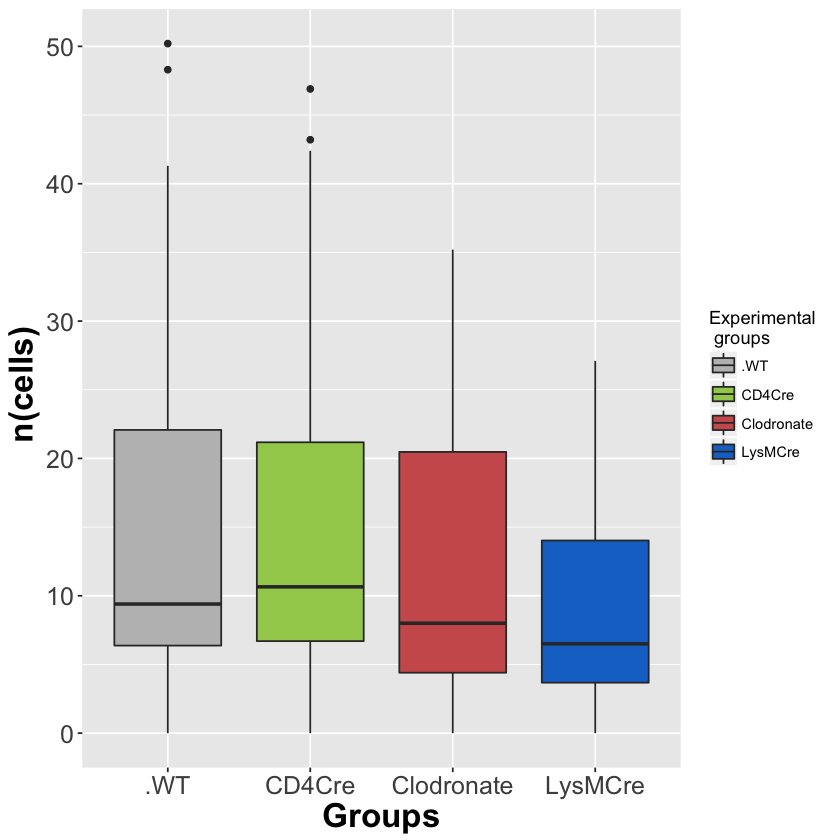

In [6]:
muti_comparison <- TukeyHSD(results)
print(muti_comparison)
s <- ggplot(data = df, aes(x=params, y=data)) + geom_boxplot(aes(fill=params)) + scale_fill_manual(name="Experimental \n groups", values=c("grey","darkolivegreen3","indianred","dodgerblue3"))

s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))

### Saving output in pdf file
#### Uncomment the following lines

In [7]:
#library(gplots)
#pdf(paste0("LP-HP_stats.pdf"), 7, 5)
#s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))
#dev.off()

Warning message:
“package ‘ggthemes’ was built under R version 3.3.2”

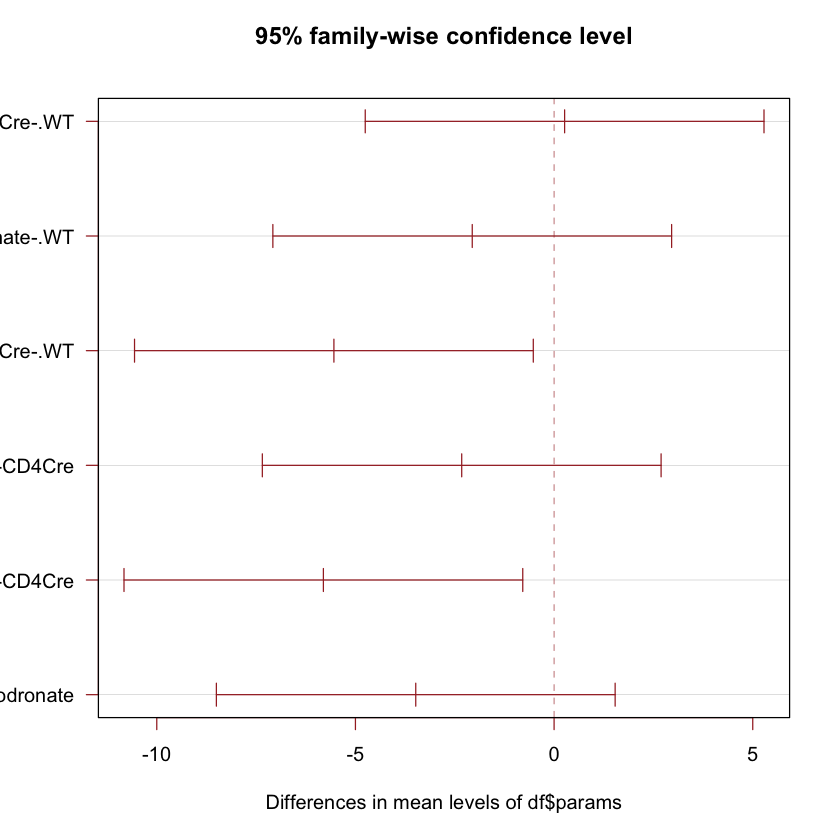

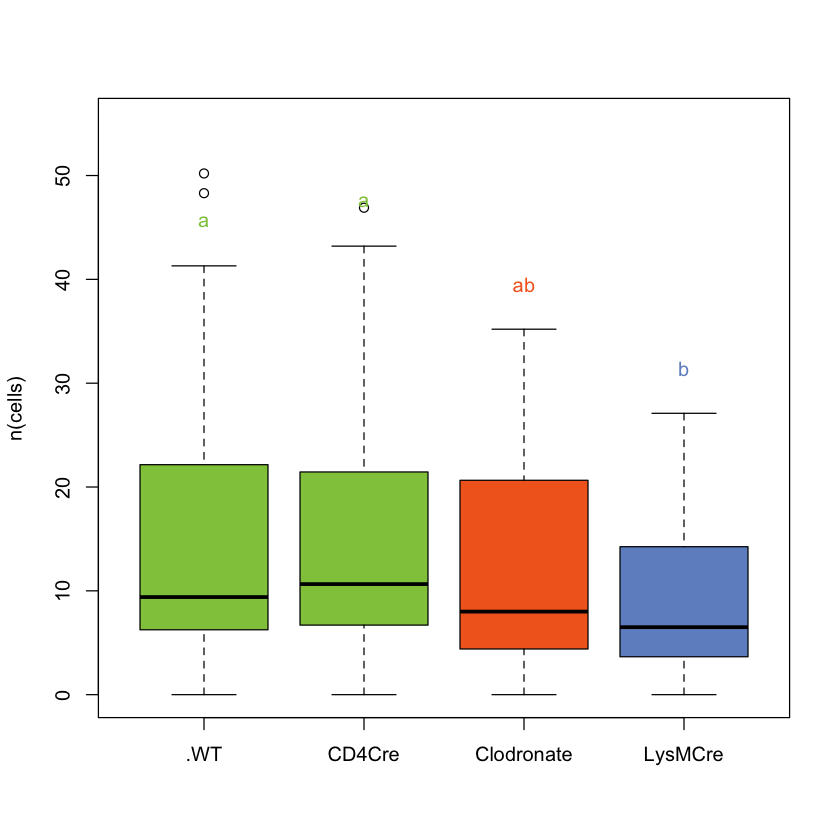

In [8]:
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)

plot(muti_comparison , las=1 , col="brown" )
TUKEY <- muti_comparison
#install.packages("multcompView")
library(multcompView)

generate_label_df <- function(TUKEY, variable){
  
  # Extract labels and factor levels from Tukey post-hoc 
  Tukey.levels <- TUKEY[[variable]][,4]
  Tukey.labels <- data.frame(multcompLetters(Tukey.levels)['Letters'])
  Tukey.labels$params=rownames(Tukey.labels)
  Tukey.labels=Tukey.labels[order(Tukey.labels$params) , ]
  return(Tukey.labels)
}

# Apply the function on my dataset
LABELS=generate_label_df(TUKEY , "df$params")

treatment <- params

# A panel of colors to draw each group with the same color :
my_colors=c( rgb(143,199,74,maxColorValue = 255),rgb(242,104,34,maxColorValue = 255), rgb(111,145,202,maxColorValue = 255),rgb(254,188,18,maxColorValue = 255) , rgb(74,132,54,maxColorValue = 255),rgb(236,33,39,maxColorValue = 255),rgb(165,103,40,maxColorValue = 255))
a=boxplot(df$data ~ df$params , ylim=c(min(df$data) , 1.1*max(df$data)) , col=my_colors[as.numeric(LABELS[,1])] , ylab="n(cells)" , main="")

# Writes the letter over each box. Over is how high you want to write it.
over=0.1*max( a$stats[nrow(a$stats),] )

#Add the labels
text( c(1:nlevels(df$params)) , a$stats[nrow(a$stats),]+over , LABELS[,1]  , col=my_colors[as.numeric(LABELS[,1])] )
#


# Resident macrophages in Lamina propria

In [9]:
WT <-read.csv("output_lp_Macrophage_State1_3.csv", header = FALSE)
Clodronate <-read.csv("output_lp_Macrophage_State1_0.csv", header = FALSE)
LysMCre <-read.csv("output_lp_Macrophage_State1_1.csv", header = FALSE)
PPARgCD4Cre <-read.csv("output_lp_Macrophage_State1_2.csv", header = FALSE)
data <- data.frame(WT,PPARgCD4Cre, Clodronate, LysMCre)
cols = c("black", "green", "red", "blue")

In [10]:
library(ggplot2)
q <- ggplot(data=WT, aes(WT$V1), legend="Groups") + 
  geom_line(aes(y=WT$V2, color=".WT"), size=1) + 
  geom_ribbon(aes(ymin=WT$V2-WT$V3/sqrt(60),
                  ymax=WT$V2+WT$V3/sqrt(60)), 
             alpha=0.6, fill="grey70") +
  geom_line(aes(y=PPARgCD4Cre$V2, color="PPARgCD4Cre") , size=1) + 
  geom_ribbon(aes(ymin=PPARgCD4Cre$V2-PPARgCD4Cre$V3/sqrt(60),
                  ymax=PPARgCD4Cre$V2+PPARgCD4Cre$V3/sqrt(60)), 
              alpha=0.6, fill="green") +
  geom_line(aes(y=LysMCre$V2, color="LysMCre"), size=1) + 
  geom_ribbon(aes(ymin=LysMCre$V2-LysMCre$V3/sqrt(60),
                  ymax=LysMCre$V2+LysMCre$V3/sqrt(60)), 
               alpha=0.6, fill = "blue") +
  geom_line(aes(y=Clodronate$V2, color="Clodronate"), size=1) + 
  geom_ribbon(aes(ymin=Clodronate$V2-Clodronate$V3/sqrt(60),
                  ymax=Clodronate$V2+Clodronate$V3/sqrt(60)), 
              alpha=0.6, fill = "red")+ 
scale_colour_manual(name="Groups", values=c(".WT"="black","PPARgCD4Cre"="green","LysMCre"="blue","Clodronate"="red"))


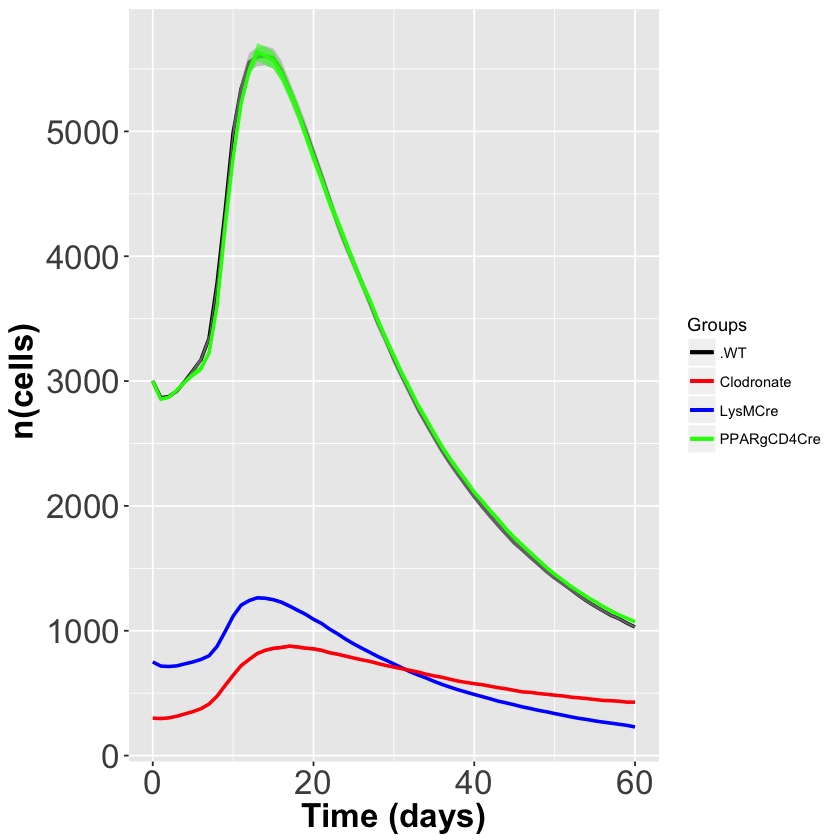

In [11]:
q + labs(x = "Time (days)", y = " n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))

### Saving output in pdf file
#### Uncomment the following lines

In [12]:
#library(gplots)
#pdf(paste0("LP_Mres.pdf"), 7, 5)
#p + labs(x = "Time (days)", y = " n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))
#dev.off()

### Statistics - ANOVA analysis

In [13]:
data1 <- WT[1:60,]
data2 <- PPARgCD4Cre[1:60,]
data3 <- Clodronate[1:60,]
data4 <- LysMCre[1:60,]
data = c(data1["V2"], data2["V2"],data3["V2"], data4["V2"])
data = unlist(data, use.names = FALSE)
length = lengths(data1["V2"])
params = c(rep.int(".WT", length), rep.int("CD4Cre", length), rep.int("Clodronate", length), rep.int("LysMCre", length))
df = data.frame(data, params)
results = aov(df$data ~ df$params)
print(summary(results))

             Df    Sum Sq   Mean Sq F value Pr(>F)    
df$params     3 343709666 114569889   109.5 <2e-16 ***
Residuals   236 246950145   1046399                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$data ~ df$params)

$`df$params`
                            diff        lwr        upr    p adj
CD4Cre-.WT             0.8933333  -482.3396   484.1262 1.000000
Clodronate-.WT     -2443.3283333 -2926.5612 -1960.0954 0.000000
LysMCre-.WT        -2340.4200000 -2823.6529 -1857.1871 0.000000
Clodronate-CD4Cre  -2444.2216667 -2927.4546 -1960.9888 0.000000
LysMCre-CD4Cre     -2341.3133333 -2824.5462 -1858.0804 0.000000
LysMCre-Clodronate   102.9083333  -380.3246   586.1412 0.946205



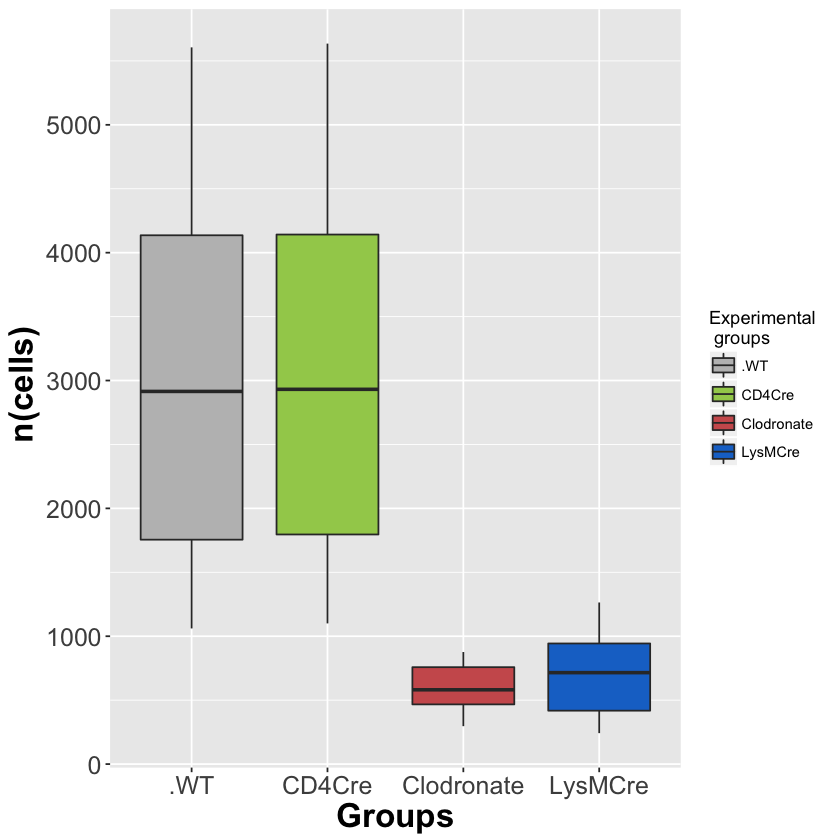

In [14]:
muti_comparison <- TukeyHSD(results)
print(muti_comparison)
s <- ggplot(data = df, aes(x=params, y=data)) + geom_boxplot(aes(fill=params)) + scale_fill_manual(name="Experimental \n groups", values=c("grey","darkolivegreen3","indianred","dodgerblue3"))
s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))

### Saving output in pdf file
#### Uncomment the following lines

In [ ]:
#library(gplots)
#pdf(paste0("LP-Mres_stats.pdf"), 7, 5)
#s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))
#dev.off()

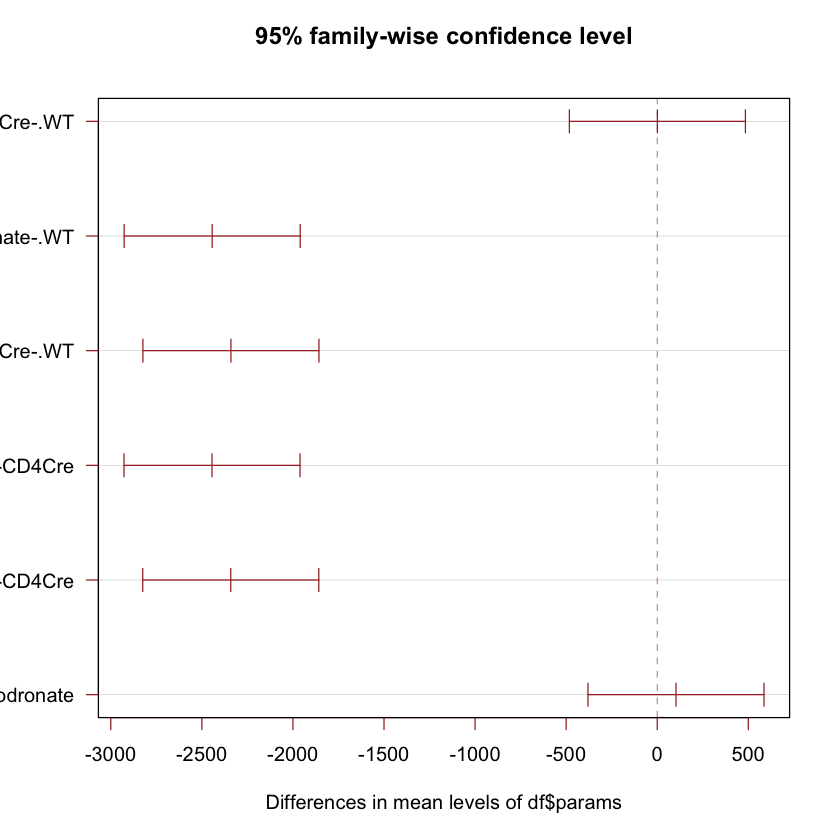

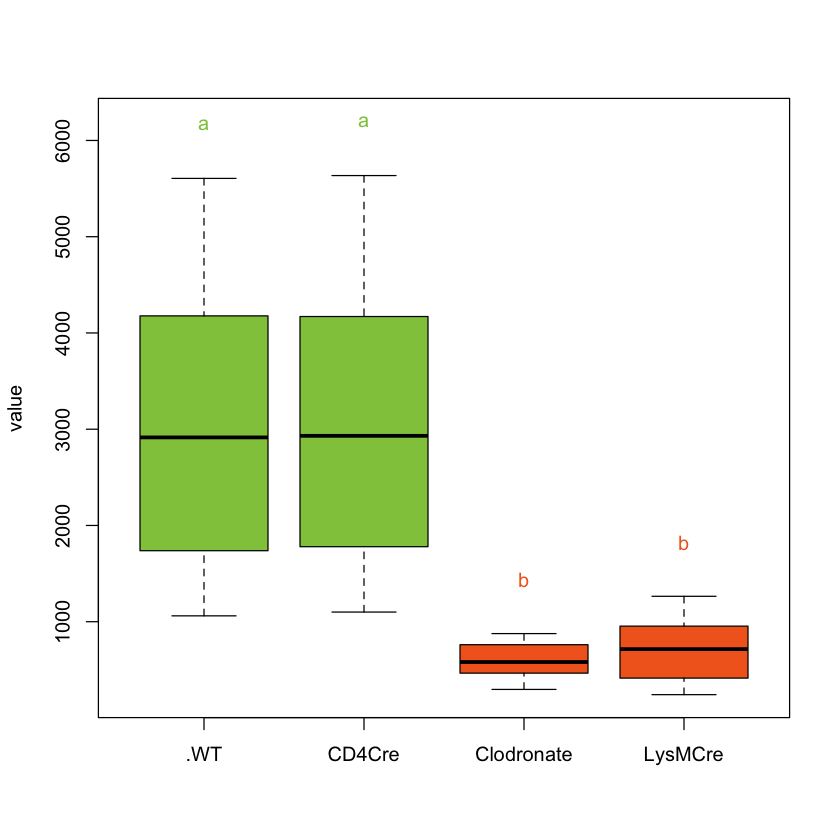

In [16]:
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)

plot(muti_comparison , las=1 , col="brown" )
TUKEY <- muti_comparison
#install.packages("multcompView")
library(multcompView)
generate_label_df <- function(TUKEY, variable){
  
  # Extract labels and factor levels from Tukey post-hoc 
  Tukey.levels <- TUKEY[[variable]][,4]
  Tukey.labels <- data.frame(multcompLetters(Tukey.levels)['Letters'])
  Tukey.labels$params=rownames(Tukey.labels)
  Tukey.labels=Tukey.labels[order(Tukey.labels$params) , ]
  return(Tukey.labels)
}

# Apply the function on my dataset
LABELS=generate_label_df(TUKEY , "df$params")

#value <- data_f
treatment <- params

# A panel of colors to draw each group with the same color :
my_colors=c( rgb(143,199,74,maxColorValue = 255),rgb(242,104,34,maxColorValue = 255), rgb(111,145,202,maxColorValue = 255),rgb(254,188,18,maxColorValue = 255) , rgb(74,132,54,maxColorValue = 255),rgb(236,33,39,maxColorValue = 255),rgb(165,103,40,maxColorValue = 255))
a=boxplot(df$data ~ df$params , ylim=c(min(df$data) , 1.1*max(df$data)) , col=my_colors[as.numeric(LABELS[,1])] , ylab="value" , main="")
over=0.1*max( a$stats[nrow(a$stats),] )

#Add the labels
text( c(1:nlevels(df$params)) , a$stats[nrow(a$stats),]+over , LABELS[,1]  , col=my_colors[as.numeric(LABELS[,1])] )
#


# Monocyte derived macrophages in Lamina Propria

In [17]:
WT <-read.csv("output_lp_Macrophage_State2_3.csv", header = FALSE)
Clodronate <-read.csv("output_lp_Macrophage_State2_0.csv", header = FALSE)
LysMCre <-read.csv("output_lp_Macrophage_State2_1.csv", header = FALSE)
PPARgCD4Cre <-read.csv("output_lp_Macrophage_State2_2.csv", header = FALSE)
data <- data.frame(WT,PPARgCD4Cre, Clodronate, LysMCre)
cols = c("black", "green", "red", "blue")

In [18]:
library(ggplot2)
q <- ggplot(data=WT, aes(WT$V1), legend="Groups") + 
  geom_line(aes(y=WT$V2, color=".WT"), size=1) + 
  geom_ribbon(aes(ymin=WT$V2-WT$V3/sqrt(60),
                  ymax=WT$V2+WT$V3/sqrt(60)), 
             alpha=0.6, fill="grey70") +
  geom_line(aes(y=PPARgCD4Cre$V2, color="PPARgCD4Cre") , size=1) + 
  geom_ribbon(aes(ymin=PPARgCD4Cre$V2-PPARgCD4Cre$V3/sqrt(60),
                  ymax=PPARgCD4Cre$V2+PPARgCD4Cre$V3/sqrt(60)), 
              alpha=0.6, fill="green") +
  geom_line(aes(y=LysMCre$V2, color="LysMCre"), size=1) + 
  geom_ribbon(aes(ymin=LysMCre$V2-LysMCre$V3/sqrt(60),
                  ymax=LysMCre$V2+LysMCre$V3/sqrt(60)), 
               alpha=0.6, fill = "blue") +
  geom_line(aes(y=Clodronate$V2, color="Clodronate"), size=1) + 
  geom_ribbon(aes(ymin=Clodronate$V2-Clodronate$V3/sqrt(60),
                  ymax=Clodronate$V2+Clodronate$V3/sqrt(60)), 
              alpha=0.6, fill = "red")+ 
scale_colour_manual(name="Groups", values=c(".WT"="black","PPARgCD4Cre"="green","LysMCre"="blue","Clodronate"="red"))


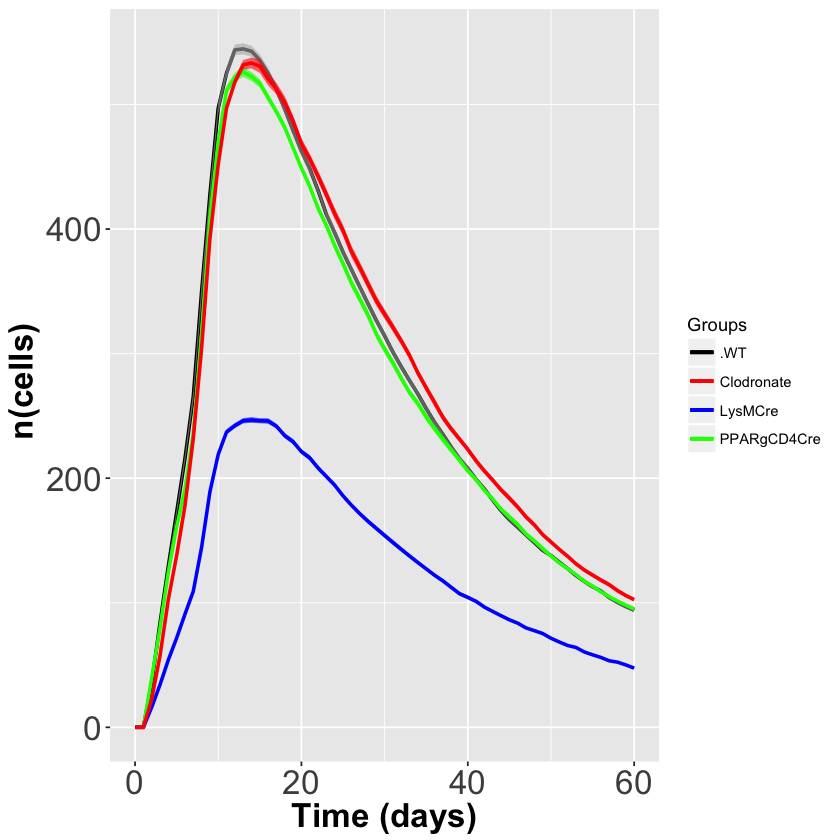

In [19]:
q + labs(x = "Time (days)", y = " n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))


### Saving output in pdf file
#### Uncomment the following lines

In [20]:
#library(gplots)
#pdf(paste0("LP_Mreg.pdf"), 7, 5)
#p + labs(x = "Time (days)", y = " n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))
#dev.off()

In [21]:
data1 <- WT[1:60,]
data2 <- PPARgCD4Cre[1:60,]
data3 <- Clodronate[1:60,]
data4 <- LysMCre[1:60,]
data = c(data1["V2"], data2["V2"],data3["V2"], data4["V2"])
data = unlist(data, use.names = FALSE)
length = lengths(data1["V2"])
params = c(rep.int(".WT", length), rep.int("CD4Cre", length), rep.int("Clodronate", length), rep.int("LysMCre", length))
df = data.frame(data, params)
results = aov(df$data ~ df$params)
print(summary(results))

             Df  Sum Sq Mean Sq F value  Pr(>F)    
df$params     3  892207  297402   15.74 2.3e-09 ***
Residuals   236 4458709   18893                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$data ~ df$params)

$`df$params`
                          diff        lwr       upr     p adj
CD4Cre-.WT           -7.938333  -72.86998  56.99331 0.9890182
Clodronate-.WT        3.073333  -61.85831  68.00498 0.9993419
LysMCre-.WT        -142.123333 -207.05498 -77.19169 0.0000003
Clodronate-CD4Cre    11.011667  -53.91998  75.94331 0.9716873
LysMCre-CD4Cre     -134.185000 -199.11665 -69.25335 0.0000013
LysMCre-Clodronate -145.196667 -210.12831 -80.26502 0.0000001



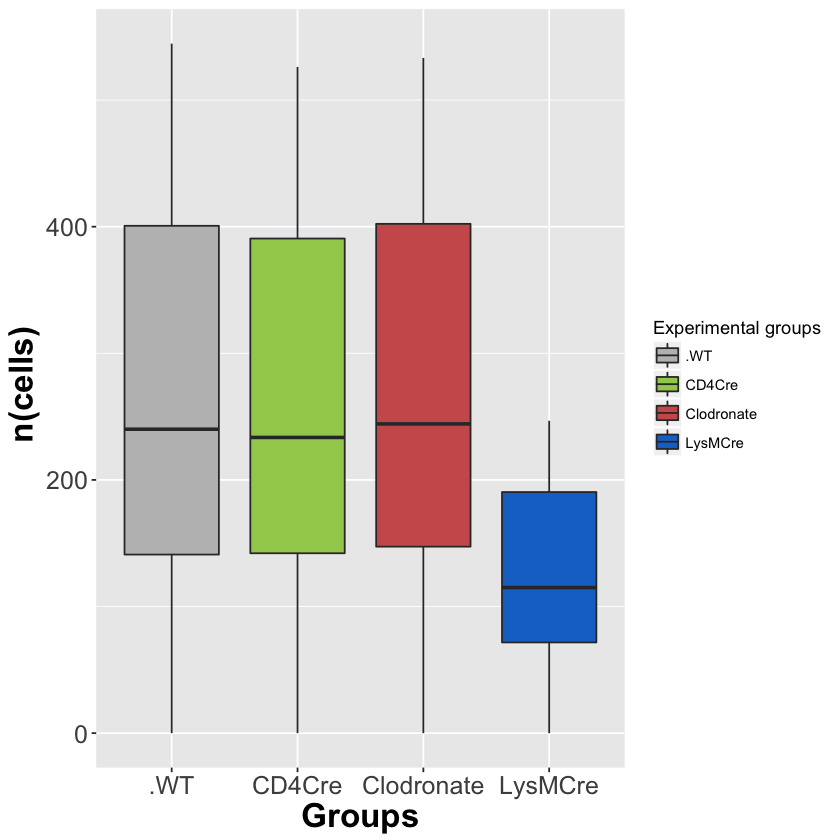

In [22]:
library(ggplot2)
muti_comparison <- TukeyHSD(results)
print(muti_comparison)
s <- ggplot(data = df, aes(x=params, y=data)) + geom_boxplot(aes(fill=params)) + scale_fill_manual(name="Experimental groups", values=c("grey","darkolivegreen3","indianred","dodgerblue3"))
s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))

### Saving output in pdf file
#### Uncomment the following lines

In [ ]:
#library(gplots)
#pdf(paste0("LP-Mreg_stats.pdf"), 7, 5)
#s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))
#dev.off()

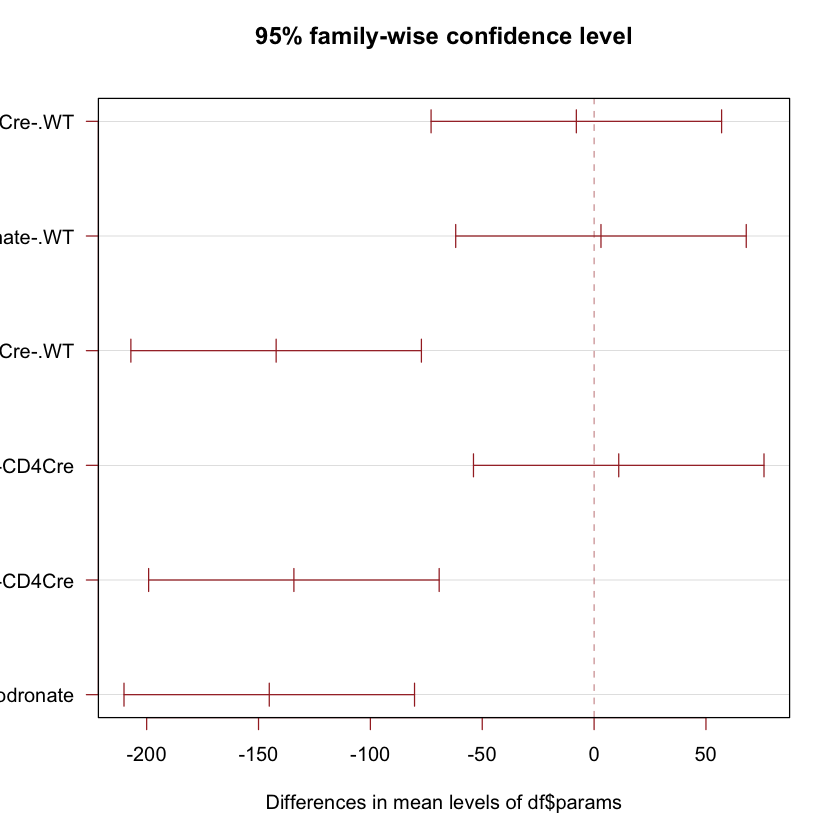

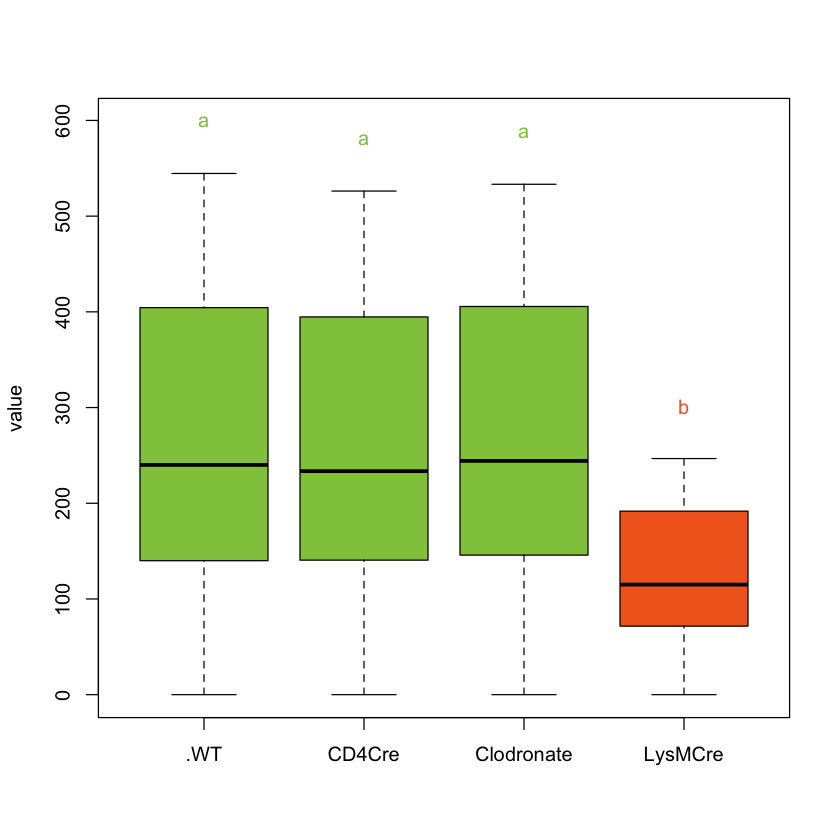

In [23]:
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)

plot(muti_comparison , las=1 , col="brown" )
TUKEY <- muti_comparison
#install.packages("multcompView")
library(multcompView)
# I need to group the treatments that are not different each other together.
generate_label_df <- function(TUKEY, variable){
  Tukey.levels <- TUKEY[[variable]][,4]
  Tukey.labels <- data.frame(multcompLetters(Tukey.levels)['Letters'])
  Tukey.labels$params=rownames(Tukey.labels)
  Tukey.labels=Tukey.labels[order(Tukey.labels$params) , ]
  return(Tukey.labels)
}

# Apply the function on my dataset
LABELS=generate_label_df(TUKEY , "df$params")

#value <- data_f
treatment <- params

# A panel of colors to draw each group with the same color :
my_colors=c( rgb(143,199,74,maxColorValue = 255),rgb(242,104,34,maxColorValue = 255), rgb(111,145,202,maxColorValue = 255),rgb(254,188,18,maxColorValue = 255) , rgb(74,132,54,maxColorValue = 255),rgb(236,33,39,maxColorValue = 255),rgb(165,103,40,maxColorValue = 255))
a=boxplot(df$data ~ df$params , ylim=c(min(df$data) , 1.1*max(df$data)) , col=my_colors[as.numeric(LABELS[,1])] , ylab="value" , main="")
over=0.1*max( a$stats[nrow(a$stats),] )

#Add the labels
text( c(1:nlevels(df$params)) , a$stats[nrow(a$stats),]+over , LABELS[,1]  , col=my_colors[as.numeric(LABELS[,1])] )
#


### Saving output in pdf file
#### Uncomment the following lines

In [24]:
#library(gplots)
#pdf(paste0("LP-Mreg_stats.pdf"), 7, 5)
#s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))
#dev.off()